In [49]:
import pandas as pd

INDIR = "../../data/"
INDIR3 = "../../plot_data/3/"
INDIR5 = "../../plot_data/5-7/"
# Path to where we will save our processed files
OUTDIR = "../../plots/"

In [50]:
# Reading matches data
df_matches = pd.read_csv(INDIR+"/RWMAG_rematched_control_augmented_rematching_30perc.csv",
                        usecols=['MAGAID','MatchMAGAID','RetractionYear'])\
                .drop_duplicates()

# Reading coordinates and collabs data
df_collabs_geo = pd.read_csv(INDIR+"collab_geo_prepost.csv")


/var/folders/bf/_6xjm2bn2_n17hfhskyq1pmw0000gp/T/ipykernel_43521/1066410520.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_collabs_geo = pd.read_csv(INDIR+"collab_geo_prepost.csv")


In [51]:
df_collabs_geo['MAGAID']

0          2.105038e+09
1          2.105038e+09
2          2.105038e+09
3          2.105038e+09
4          2.105038e+09
               ...     
7053037    2.294600e+09
7053038    2.294600e+09
7053039    2.294600e+09
7053040    2.294600e+09
7053041    2.294600e+09
Name: MAGAID, Length: 7053042, dtype: float64

# Fixing affiliations

In [52]:
df_collabs_geo.columns.tolist()

['MAGAID',
 'ScientistType',
 'MAGCollaborationYear',
 'MAGCollabAID',
 'YearOfAttrition',
 'RetractionYear',
 'FirstCollaborationYear',
 'RyearMinusCollabYear',
 'PrePostFlag',
 'Post_Count',
 'Pre_Count',
 'MAGAffPID',
 'MAGAffID',
 'MAGAffYear',
 'MAGAffRank',
 'MAGMaxAffYearByCollabYear',
 'MAGCollabAffPID',
 'MAGCollabAffID',
 'MAGCollabAffYear',
 'MAGCollabAffRank',
 'MAGMaxCollabAffYearByCollabYear',
 'MAGAffName',
 'MAGAffLatLong',
 'MAGAffCountry',
 'MAGAffCity',
 'MAGCollabAffName',
 'MAGCollabAffLatLong',
 'MAGCollabAffCountry',
 'MAGCollabAffCity']

In [54]:
df_collabs_geo[df_collabs_geo['MAGCollabAffLatLong'].isna()]['MAGAID'].nunique()

2166

In [55]:
df_collabs_geo[df_collabs_geo['MAGAffLatLong'].isna() & 
                        ~df_collabs_geo['MAGAffID'].isna()]['MAGAID'].nunique()

225

In [56]:
df_affiliations = pd.read_csv(INDIR5+"/Affiliations.txt", sep="\t", header=None, 
                             usecols=[0,2,10, 11,12])\
                            .rename(columns={0:'MAGAffID',
                                            2:'MAGAffName',
                                            10:'MAGAffCountryAbbr',
                                            11: 'MAGAffLat',
                                            12: 'MAGAffLong'})

df_affiliations['MAGAffLatLong'] = df_affiliations['MAGAffLat'].astype(str) \
                                        + "," + df_affiliations['MAGAffLong'].astype(str)


In [57]:
# We will drop the old columns: MAGAffName, MAGAffLatLong, MAGCollabAffName, MAGCollabAffLatLong

columns_to_drop = ['MAGAffName', 'MAGAffLatLong', 'MAGCollabAffName', 'MAGCollabAffLatLong']

# Fixing treatment

df_collabs_geo = df_collabs_geo.drop(columns=columns_to_drop)\
                                .drop_duplicates().merge(df_affiliations, on='MAGAffID')
df_collabs_geo = df_collabs_geo\
                                .merge(df_affiliations.rename(columns={'MAGAffID':'MAGCollabAffID',
                                                                      'MAGAffName':'MAGCollabAffName',
                                                                      'MAGAffCountryAbbr':'MAGCollabAffCountryAbbr',
                                                                      'MAGAffLat':'MAGCollabAffLat',
                                                                      'MAGAffLong':'MAGCollabAffLong',
                                                                      'MAGAffLatLong':'MAGCollabAffLatLong'}), 
                                                              on='MAGCollabAffID')
                                                                

In [58]:
# These are places for which we do not have latitutde and longitude
coordinates = {
    'aalborg university esbjerg': {'latitude': 55.4667, 'longitude': 8.4500},
    'academy of engineering': {'latitude': 18.5093, 'longitude': 73.8284},
    'addiction research center': {'latitude': 42.2780, 'longitude': -83.7382},
    'adma': {'latitude': 38.9637, 'longitude': 35.2433},
    'agricultural and food research council': {'latitude': 51.7456, 'longitude': -0.4725},
    'albert einstein institution': {'latitude': 42.3736, 'longitude': -71.1097},
    'american college of surgeons oncology group': {'latitude': 41.8795, 'longitude': -87.6243},
    'american hereford association': {'latitude': 39.1000, 'longitude': -94.5794},
    'amity institute of biotechnology': {'latitude': 28.6094, 'longitude': 77.3178},
    'analytica': {'latitude': 41.0082, 'longitude': 28.9784},
    'animal reproduction research institute': {'latitude': 29.9753, 'longitude': 31.0364},
    'ansbach': {'latitude': 49.3040, 'longitude': 10.5710},
    'april': {'latitude': 52.3762, 'longitude': 4.8945},
    'asci corporation': {'latitude': 35.6895, 'longitude': 139.6917},
    'avago technologies': {'latitude': 37.3852, 'longitude': -122.0838},
    'basf plant science': {'latitude': 49.4861, 'longitude': 8.4939},
    'bundeswehr institute of microbiology': {'latitude': 48.1351, 'longitude': 11.5820},
    'bureau of animal industry': {'latitude': 38.9072, 'longitude': -77.0369},
    'bureau of medicine and surgery': {'latitude': 38.8951, 'longitude': -77.0364},
    'california geological survey': {'latitude': 38.5766, 'longitude': -121.4944},
    'canterbury archaeological trust': {'latitude': 51.2802, 'longitude': 1.0789},
    'carlo besta neurological institute': {'latitude': 45.4654, 'longitude': 9.1865},
    'catalan institute of nanotechnology': {'latitude': 41.3851, 'longitude': 2.1734},
    'catholic university college kensington': {'latitude': 51.4975, 'longitude': -0.1749},
    'center for cell and gene therapy': {'latitude': 29.7604, 'longitude': -95.3698},
    'center for functional nanomaterials': {'latitude': 40.8690, 'longitude': -72.8770},
    'center for information security technologies': {'latitude': 37.5665, 'longitude': 126.9780},
    'center for theoretical studies university of miami': {'latitude': 25.7174, 'longitude': -80.2770},
    'centraalbureau voor schimmelcultures': {'latitude': 52.0897, 'longitude': 5.1214},
    'central university india': {'latitude': 23.2599, 'longitude': 77.4126},
    'centralesupelec': {'latitude': 48.8067, 'longitude': 2.2399},
    'centre de donnees astronomiques de strasbourg': {'latitude': 48.5734, 'longitude': 7.7521},
    'centre for blood research': {'latitude': 49.2827, 'longitude': -123.1207},
    'centre for research on inner city health': {'latitude': 43.6544, 'longitude': -79.3807},
    'centre for social studies': {'latitude': 41.1579, 'longitude': -8.6291},
    'centre national d etudes des telecommunications': {'latitude': 48.8566, 'longitude': 2.3522},
    'centro de investigacion y desarrollo tecnologico en electroquimica': {'latitude': 20.6597, 'longitude': -100.2931},
    'centro de investigaciones de astronomia': {'latitude': 8.6212, 'longitude': -70.2208},
    'cerna': {'latitude': 45.7606, 'longitude': 4.8369},
    'chamber of commerce': {'latitude': 40.7128, 'longitude': -74.0060},
    'china center for economic research': {'latitude': 39.9042, 'longitude': 116.4074},
    'cime': {'latitude': 41.9028, 'longitude': 12.4964},
    'college of information technology': {'latitude': 24.2992, 'longitude': 54.6973},
    'college of tropical agriculture and human resources': {'latitude': 21.2894, 'longitude': -157.9175},
    'commission on security and cooperation in europe': {'latitude': 38.9072, 'longitude': -77.0369},
    'community emergency response team': {'latitude': 34.0522, 'longitude': -118.2437},
    'comprehensive epilepsy center': {'latitude': 40.7128, 'longitude': -74.0060},
    'consiglio per la ricerca e la sperimentazione in agricoltura': {'latitude': 41.9028, 'longitude': 12.4964},
    'coordenadoria de aperfeicoamento de pessoal de nivel superior': {'latitude': -15.7801, 'longitude': -47.9292},
    'coordinadora mercantil s a': {'latitude': -34.6037, 'longitude': -58.3816},
    'countryside council for wales': {'latitude': 51.4816, 'longitude': -3.1791},
    'defence medical services': {'latitude': 51.5074, 'longitude': -0.1278},
    'delaware biotechnology institute': {'latitude': 39.6837, 'longitude': -75.7497},
    'department of agriculture fisheries and forestry': {'latitude': -27.4698, 'longitude': 153.0251},
    'department of employment economic development and innovation': {'latitude': -27.4698, 'longitude': 153.0251},
    'deutsches geodatisches forschungsinstitut': {'latitude': 48.1351, 'longitude': 11.5820},
    'dna plant technology': {'latitude': 40.7128, 'longitude': -74.0060},
    'doncaster r f c': {'latitude': 53.5228, 'longitude': -1.1280},
    'dupont central research': {'latitude': 39.7459, 'longitude': -75.5466},
    'eastern cooperative oncology group': {'latitude': 40.7128, 'longitude': -74.0060},
    'edward grey institute of field ornithology': {'latitude': 51.7548, 'longitude': -1.2544},
    'electronics research center': {'latitude': 42.3601, 'longitude': -71.0589},
    'english nature': {'latitude': 52.6309, 'longitude': 1.2974},
    'eppley institute for research in cancer and allied diseases': {'latitude': 41.2524, 'longitude': -95.9980},
    'erasmus research institute of management': {'latitude': 51.9225, 'longitude': 4.4791},
    'evandro chagas institute': {'latitude': -1.4558, 'longitude': -48.5033},
    'falklands conservation': {'latitude': -51.7963, 'longitude': -59.5236},
    'fellow of the american college of surgeons': {'latitude': 41.8781, 'longitude': -87.6298},
    'finnish institute of marine research': {'latitude': 60.1695, 'longitude': 24.9354},
    'finsen laboratory': {'latitude': 55.6759, 'longitude': 12.5655},
    'forensic science service': {'latitude': 52.4862, 'longitude': -1.8904},
    'forestry research institute of ghana': {'latitude': 6.6918, 'longitude': -1.5703},
    'fortune': {'latitude': 40.7128, 'longitude': -74.0060},
    'fundacion favaloro': {'latitude': -34.6037, 'longitude': -58.3816},
    'geballe laboratory for advanced materials': {'latitude': 37.8719, 'longitude': -122.2585},
    'geode': {'latitude': 48.8566, 'longitude': 2.3522},
    'geological society of india': {'latitude': 12.9716, 'longitude': 77.5946},
    'greehey children s cancer research institute': {'latitude': 29.4241, 'longitude': -98.4936},
    'green cross international': {'latitude': 46.2044, 'longitude': 6.1432},
    'health and welfare canada': {'latitude': 45.4215, 'longitude': -75.6972},
    'hitec': {'latitude': 40.7128, 'longitude': -74.0060},
    'hoechst schering agrevo gmbh': {'latitude': 50.1109, 'longitude': 8.6821},
    'hortresearch': {'latitude': -36.8485, 'longitude': 174.7633},
    'i o r': {'latitude': 41.9028, 'longitude': 12.4964},
    'ifa tulln': {'latitude': 48.3285, 'longitude': 16.0643},
    'illawarra health medical research institute': {'latitude': -34.4278, 'longitude': 150.8931},
    'imtek': {'latitude': 48.0278, 'longitude': 7.8365},
    'indian national association': {'latitude': 28.6139, 'longitude': 77.2090},
    'indiana statewide testing for educational progress plus': {'latitude': 39.7684, 'longitude': -86.1581},
    'inmed': {'latitude': 40.7128, 'longitude': -74.0060},
    'institut de mathematiques de toulouse': {'latitude': 43.6047, 'longitude': 1.4442},
    'institut de recherche en communications et cybernetique de nantes': {'latitude': 47.2184, 'longitude': -1.5536},
    'institut national d etudes demographiques': {'latitude': 48.8566, 'longitude': 2.3522},
    'institut national de recherche sur les transports et leur securite': {'latitude': 48.8566, 'longitude': 2.3522},
    'institute for transuranium elements': {'latitude': 49.014, 'longitude': 8.3995},
    'institute of cosmology and gravitation university of portsmouth': {'latitude': 50.7989, 'longitude': -1.0912},
    'institute of insect sciences zhejiang university': {'latitude': 30.2741, 'longitude': 120.1551},
    'instituto de biologia molecular e celular': {'latitude': 41.1579, 'longitude': -8.6291},
    'instituto de medicina tropical alexander von humboldt': {'latitude': -12.0464, 'longitude': -77.0428},
    'instituto nacional de saude dr ricardo jorge': {'latitude': 38.7169, 'longitude': -9.1399},
    'instituto nacional dos recursos biologicos': {'latitude': 38.7169, 'longitude': -9.1399},
    'instruments research and development establishment': {'latitude': 29.9457, 'longitude': 78.1642},
    'intel mobile communications': {'latitude': 37.3861, 'longitude': -122.0839},
    'interdisciplinary center for scientific computing': {'latitude': 49.3988, 'longitude': 8.6724},
    'international association of classification societies': {'latitude': 51.5074, 'longitude': -0.1278},
    'international seismological centre': {'latitude': 51.5099, 'longitude': -0.1181},
    'international society for intelligence research': {'latitude': 37.7749, 'longitude': -122.4194},
    'irsa': {'latitude': 45.4642, 'longitude': 9.1900},
    'israel nature and parks authority': {'latitude': 31.7683, 'longitude': 35.2137},
    'it university': {'latitude': 55.6761, 'longitude': 12.5683},
    'jinan military region': {'latitude': 36.6512, 'longitude': 117.1201},
    'john p hussman institute for human genomics': {'latitude': 25.7617, 'longitude': -80.1918},
    'joint institute for nuclear astrophysics': {'latitude': 41.6991, 'longitude': -86.2392},
    'karatina university': {'latitude': -0.4745, 'longitude': 36.9553},
    'kavli institute of nanoscience': {'latitude': 51.9985, 'longitude': 4.3764},
    'kawasaki steel corporation': {'latitude': 35.7100, 'longitude': 139.8107},
    'kentucky department of education': {'latitude': 38.2527, 'longitude': -85.7585},
    'kigali institute of science and technology': {'latitude': -1.9536, 'longitude': 30.0594},
    'kma': {'latitude': 60.3913, 'longitude': 5.3221},
    'l abri': {'latitude': 47.0499, 'longitude': 8.3161},
    'langfang teachers college': {'latitude': 39.5294, 'longitude': 116.7044},
    'leonardo': {'latitude': 45.4642, 'longitude': 9.1900},
    'long term ecological research network': {'latitude': 38.9072, 'longitude': -77.0369},
    'louisiana public service commission': {'latitude': 30.4583, 'longitude': -91.1403},
    'magister': {'latitude': 55.7558, 'longitude': 37.6173},
    'medical corps': {'latitude': 31.7683, 'longitude': 35.2137},
    'menninger foundation': {'latitude': 39.0997, 'longitude': -94.5786},
    'minerva foundation institute for medical research': {'latitude': 60.1695, 'longitude': 24.9354},
    'ministry of science and innovation': {'latitude': -36.8485, 'longitude': 174.7633},
    'mizuho information research institute': {'latitude': 35.6895, 'longitude': 139.6917},
    'molecular medicine partnership unit': {'latitude': 49.3988, 'longitude': 8.6724},
    'nanchang institute of aeronautical technology': {'latitude': 28.6829, 'longitude': 115.8582},
    'nasa lunar science institute': {'latitude': 37.7749, 'longitude': -122.4194},
    'national agricultural research centre': {'latitude': 33.6844, 'longitude': 73.0479},
    'national blood service': {'latitude': 51.5099, 'longitude': -0.1181},
    'national center for charitable statistics': {'latitude': 38.9072, 'longitude': -77.0369},
    'national center for research resources': {'latitude': 38.9072, 'longitude': -77.0369},
    'national clonal germplasm repository': {'latitude': 40.7128, 'longitude': -74.0060},
    'national fisheries research development institute': {'latitude': 36.2048, 'longitude': 138.2529},
    'national herbarium of the netherlands': {'latitude': 52.0809, 'longitude': 4.3230},
    'national microbiology laboratory': {'latitude': 49.8951, 'longitude': -97.1384},
    'national resource center': {'latitude': 38.9072, 'longitude': -77.0369},
    'national space institute': {'latitude': 55.6761, 'longitude': 12.5683},
    'neusoft institute of information': {'latitude': 41.8057, 'longitude': 123.4315},
    'new jersey agricultural experiment station': {'latitude': 40.7128, 'longitude': -74.0060},
    'ningbo institute of technology zhejiang university': {'latitude': 29.8683, 'longitude': 121.5439},
    'northeast petroleum university': {'latitude': 46.5967, 'longitude': 125.1406},
    'northern health': {'latitude': -37.8136, 'longitude': 144.9631},
    'norwegian air ambulance': {'latitude': 59.9139, 'longitude': 10.7522},
    'norwegian food research institute': {'latitude': 59.9139, 'longitude': 10.7522},
    'nova southeastern university oceanographic center': {'latitude': 26.0898, 'longitude': -80.1870},
    'novartis institute for tropical diseases': {'latitude': 1.3521, 'longitude': 103.8198},
    'novum': {'latitude': 51.5099, 'longitude': -0.1181},
    'oak ridge institute for science and education': {'latitude': 36.0104, 'longitude': -84.2696},
    'obras sociais irma dulce': {'latitude': -12.9714, 'longitude': -38.5014},
    'odessa': {'latitude': 46.4825, 'longitude': 30.7233},
    'p g college': {'latitude': 25.3176, 'longitude': 82.9739},
    'pan african university': {'latitude': 6.5244, 'longitude': 3.3792},
    'paradigm': {'latitude': 40.7128, 'longitude': -74.0060},
    'plant genome mapping laboratory': {'latitude': 33.7490, 'longitude': -84.3880},
    'polytechnic institute of santarem': {'latitude': 39.2333, 'longitude': -8.6833},
    'privat group': {'latitude': 48.3794, 'longitude': 31.1656},
    'public schools of rockford illinois': {'latitude': 42.2711, 'longitude': -89.0937},
    'qingdao binhai university': {'latitude': 36.0662, 'longitude': 120.3826},
    'rajamangala university of technology': {'latitude': 13.7563, 'longitude': 100.5018},
    'residence inn by marriott': {'latitude': 40.7128, 'longitude': -74.0060},
    'robertson centre for biostatistics': {'latitude': 55.8642, 'longitude': -4.2518},
    'royal college of dentists of canada': {'latitude': 43.6532, 'longitude': -79.3832},
    'royal life saving society australia': {'latitude': -33.8688, 'longitude': 151.2093},
    'royal society for the conservation of nature': {'latitude': 31.9539, 'longitude': 35.9106},
    'russian academy': {'latitude': 55.7558, 'longitude': 37.6173},
    'samu social': {'latitude': 48.8566, 'longitude': 2.3522},
    'sesam': {'latitude': 48.1351, 'longitude': 11.5820},
    'seychelles islands foundation': {'latitude': -4.6796, 'longitude': 55.4920},
    'shijiazhuang railway institute': {'latitude': 38.0428, 'longitude': 114.5149},
    'singapore mit alliance': {'latitude': 1.3521, 'longitude': 103.8198},
    'sistema nacional de investigadores': {'latitude': 19.4326, 'longitude': -99.1332},
    'southern education and library board': {'latitude': 54.5973, 'longitude': -5.9301},
    'sp technical research institute of sweden': {'latitude': 57.7089, 'longitude': 11.9746},
    'special rapporteur': {'latitude': 46.2044, 'longitude': 6.1432},
    'st joseph s healthcare hamilton': {'latitude': 43.2557, 'longitude': -79.8711},
    'st michael s gaa sligo': {'latitude': 54.2697, 'longitude': -8.4694},
    'stockholm centre of public health': {'latitude': 59.3293, 'longitude': 18.0686},
    'stone aerospace': {'latitude': 30.2672, 'longitude': -97.7431},
    'swedish institute for food and biotechnology': {'latitude': 57.7089, 'longitude': 11.9746},
    'swiss finance institute': {'latitude': 46.2044, 'longitude': 6.1432},
    'swiss institute of allergy and asthma research': {'latitude': 46.7784, 'longitude': 9.6827},
    'teacher training college': {'latitude': 51.5074, 'longitude': -0.1278},
    'the joanna briggs institute': {'latitude': -34.9285, 'longitude': 138.6007},
    'the racah institute of physics': {'latitude': 31.7683, 'longitude': 35.2137},
    'translational centre for regenerative medicine': {'latitude': 51.3397, 'longitude': 12.3731},
    'turkcell': {'latitude': 41.0082, 'longitude': 28.9784},
    'ufvjm': {'latitude': -18.2254, 'longitude': -43.9936},
    'ultra': {'latitude': 51.5074, 'longitude': -0.1278},
    'uni health': {'latitude': 40.7128, 'longitude': -74.0060},
    'united hospitals': {'latitude': 40.7128, 'longitude': -74.0060},
    'united states military hiv research program': {'latitude': 38.9072, 'longitude': -77.0369},
    'united states office of research integrity': {'latitude': 38.9072, 'longitude': -77.0369},
    'univates': {'latitude': -29.6403, 'longitude': -52.2139},
    'universidade de santa cruz do sul': {'latitude': -29.722, 'longitude': -52.4341},
    'universidade estadual do parana': {'latitude': -25.4284, 'longitude': -49.2733},
    'universite de setif': {'latitude': 36.1909, 'longitude': 5.4100},
    'universite nantes angers le mans': {'latitude': 47.2184, 'longitude': -1.5536},
    'universiti sains malaysia engineering campus': {'latitude': 5.358, 'longitude': 100.496},
    'university of clermont ferrand': {'latitude': 45.7772, 'longitude': 3.0823},
    'university of west virginia': {'latitude': 39.6357, 'longitude': -79.9559},
    'ussr academy of medical sciences': {'latitude': 55.7558, 'longitude': 37.6173},
    'vaccine research center': {'latitude': 39.0394, 'longitude': -77.4924},
    'vavilov state optical institute': {'latitude': 59.9311, 'longitude': 30.3609},
    'veterans affairs canada': {'latitude': 45.4215, 'longitude': -75.6972},
    'vinh university': {'latitude': 18.6808, 'longitude': 105.6813},
    'wake forest institute for regenerative medicine': {'latitude': 36.0999, 'longitude': -80.2442},
    'waltham centre for pet nutrition': {'latitude': 52.6718, 'longitude': -1.2092},
    'warwick hri': {'latitude': 52.3793, 'longitude': -1.5615},
    'western institute': {'latitude': -33.8688, 'longitude': 151.2093},
    'weston education centre': {'latitude': 51.4816, 'longitude': -0.1122},
    'white oak conservation': {'latitude': 30.8194, 'longitude': -81.7132},
    'zhejiang california international nanosystems institute': {'latitude': 30.2741, 'longitude': 120.1551}
}


In [59]:
# Function to update latitude and longitude
def update_coordinates(row):
    key = row['MAGCollabAffName']
    if key in coordinates:
        row['MAGCollabAffLat'] = coordinates[key]['latitude']
        row['MAGCollabAffLong'] = coordinates[key]['longitude']
        row['MAGCollabAffLatLong'] = str(coordinates[key]['latitude'])+","+str(coordinates[key]['longitude'])
    key = row['MAGAffName']
    if key in coordinates:
        row['MAGAffLat'] = coordinates[key]['latitude']
        row['MAGAffLong'] = coordinates[key]['longitude']
        row['MAGAffLatLong'] = str(coordinates[key]['latitude'])+","+str(coordinates[key]['longitude'])
    return row

# Apply function to DataFrame
df_collabs_geo = df_collabs_geo.apply(update_coordinates, axis=1)

In [61]:
# First we shall filter authors who have either no pre- or no post- collaborators with affiliations
magaids_not_allowed = df_collabs_geo[df_collabs_geo['Post_Count'].eq(0) | df_collabs_geo['Pre_Count'].eq(0)]['MAGAID']

# Separating matches and magaids
df_collabs_geo_treatment = df_collabs_geo[df_collabs_geo['ScientistType']=='retracted']
df_collabs_geo_control = df_collabs_geo[df_collabs_geo['ScientistType']=='matched']

# Merging MAGAID to control
df_collabs_geo_control = df_collabs_geo_control.rename(columns={'MAGAID':'MatchMAGAID'})
df_collabs_geo_control = df_collabs_geo_control.merge(df_matches, on=['MatchMAGAID','RetractionYear'], how='left')

# Removing these magaids and their matches
df_collabs_geo_treatment = df_collabs_geo_treatment[~df_collabs_geo_treatment['MAGAID'].isin(magaids_not_allowed)]
df_collabs_geo_control = df_collabs_geo_control[~df_collabs_geo_control['MAGAID'].isin(magaids_not_allowed)]

# Let us ensure that both control and treatment have same magaids
intersection_magaids = set(df_collabs_geo_treatment['MAGAID'].unique())\
                            .intersection(df_collabs_geo_control['MAGAID'].unique())

df_collabs_geo_treatment = df_collabs_geo_treatment[df_collabs_geo_treatment['MAGAID'].isin(intersection_magaids)]
df_collabs_geo_control = df_collabs_geo_control[df_collabs_geo_control['MAGAID'].isin(intersection_magaids)]


In [62]:
df_collabs_geo

,MAGAID,ScientistType,MAGCollaborationYear,MAGCollabAID,YearOfAttrition,RetractionYear,FirstCollaborationYear,RyearMinusCollabYear,PrePostFlag,Post_Count,...,MAGAffName,MAGAffCountryAbbr,MAGAffLat,MAGAffLong,MAGAffLatLong,MAGCollabAffName,MAGCollabAffCountryAbbr,MAGCollabAffLat,MAGCollabAffLong,MAGCollabAffLatLong
0,2.105038e+09,retracted,1992.0,2658824643,2000.0,1994.0,1992.0,2.0,Pre,4.0,...,australian national university,AU,-35.27780,149.12050,"-35.2778,149.1205",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134"
1,2.105038e+09,retracted,1992.0,2698118962,2000.0,1994.0,1992.0,2.0,Pre,4.0,...,australian national university,AU,-35.27780,149.12050,"-35.2778,149.1205",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134"
2,2.001336e+09,retracted,2001.0,2554923814,2020.0,2007.0,2001.0,6.0,Pre,21.0,...,university of cambridge,GB,52.20528,0.11722,"52.20528,0.11722",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134"
3,2.001336e+09,retracted,2001.0,2554923814,2020.0,2007.0,2001.0,6.0,Pre,21.0,...,university of cambridge,GB,52.20528,0.11722,"52.20528,0.11722",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134"
4,2.001336e+09,retracted,2001.0,3165105367,2020.0,2007.0,2001.0,6.0,Pre,21.0,...,university of cambridge,GB,52.20528,0.11722,"52.20528,0.11722",monash university clayton campus,AU,-37.91000,145.134,"-37.91,145.134"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053037,2.589751e+09,matched,2020.0,1131436997,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,university of oradea,RO,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92"
7053038,2.589751e+09,matched,2020.0,2031985322,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,university of oradea,RO,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92"
7053039,2.589751e+09,matched,2020.0,2031985322,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,university of oradea,RO,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92"
7053040,2.589751e+09,matched,2020.0,2031985322,2020.0,2015.0,2020.0,-5.0,Post,6.0,...,university of oradea,RO,47.04556,21.92000,"47.04556,21.92",university of oradea,RO,47.04556,21.920,"47.04556,21.92"


In [63]:
df_collabs_geo_treatment['MAGAID'].nunique()

1224

In [64]:
df_collabs_geo_control['MAGAID'].nunique()

1224

In [65]:
from geopy.distance import distance
import numpy as np

def calculate_distances(df):
    """
    Calculate distances between coordinates in the 'MAGCollabLatLong' 
    and 'MAGLatLong' columns of the dataframe df using geopy.
    """
    # Define a helper function to parse coordinates and calculate distance
    def get_distance(row):
        try:
            # Parse the coordinates
            collab_coords = tuple(map(float, row['MAGCollabAffLatLong'].split(',')))
            mag_coords = tuple(map(float, row['MAGAffLatLong'].split(',')))
            
            # Calculate and return the distance
            return distance(collab_coords, mag_coords).km
        except:
            # In case of any value error, such as parsing issues, return NaN
            return np.nan
    
    # Apply the helper function to each row to compute the distance
    df['Distance_km'] = df.apply(get_distance, axis=1)
    
    return df

In [66]:
# computing distance between unique latitute and longitude
df_unique_latlongs = df_collabs_geo[['MAGCollabAffLatLong','MAGAffLatLong']].drop_duplicates()

df_latlongs_wDistance = calculate_distances(df_unique_latlongs)

In [67]:
# merging distance with treatment
df_collabs_geo_treatment_wDist = df_collabs_geo_treatment.merge(df_latlongs_wDistance,
                                                               on=['MAGCollabAffLatLong','MAGAffLatLong'])

In [68]:
# merging ditance with control
df_collabs_geo_control_wDist = df_collabs_geo_control.merge(df_latlongs_wDistance,
                                                               on=['MAGCollabAffLatLong','MAGAffLatLong'])

In [69]:
# Checking how many had collaborators or their own aff with no lat long for treatment 
df_collabs_geo_treatment_wDist[df_collabs_geo_treatment_wDist['Distance_km'].isna()]['MAGCollabAffName'].unique()

array([], dtype=object)

In [70]:
# Checking how many had collaborators or their own aff with no lat long for treatment
df_collabs_geo_control_wDist[df_collabs_geo_control_wDist['Distance_km'].isna()]['MAGAID'].nunique()

0

In [71]:
# Checking how many had collaborators or their own aff with no lat long for control
df_collabs_geo_control_wDist[df_collabs_geo_control_wDist['Distance_km'].isna()]['MAGAID'].nunique()

0

In [72]:
df_collabs_geo_control_wDist.shape

(1278391, 37)

In [74]:
treatment_means = []
control_means = []

for i in range(100):
    # Choosing random match from control for each MAGAID
    df_random_match_control = df_collabs_geo_control_wDist[~df_collabs_geo_control_wDist['Distance_km'].isna()]

    df_random_match_control = df_random_match_control[['MAGAID','MatchMAGAID']].drop_duplicates()

    df_random_match_control = df_random_match_control.groupby('MAGAID')\
                                    .apply(lambda x: x.sample(1)).reset_index(drop=True)

    # Getting the whole dataframe
    df_random_match_control = df_collabs_geo_control_wDist.merge(df_random_match_control,
                                                                on=['MAGAID','MatchMAGAID'])

    # Again ensuring both treatment and control have same magaids

    magaids_intersection = set(df_random_match_control['MAGAID'])\
                                .intersection(set(df_collabs_geo_treatment_wDist['MAGAID']))

    df_random_match_control = df_random_match_control[df_random_match_control['MAGAID'].isin(magaids_intersection)]

    # same for treatment
    df_collabs_geo_treatment_wDist = df_collabs_geo_treatment_wDist[df_collabs_geo_treatment_wDist['MAGAID']\
                                                                    .isin(magaids_intersection)]

    # separating pre and post collaborator distances for treatment and control

    treatment_pre = df_collabs_geo_treatment_wDist[df_collabs_geo_treatment_wDist['PrePostFlag']=='Pre']\
                        [['MAGAID','MAGCollabAID','Distance_km']].drop_duplicates()

    treatment_post = df_collabs_geo_treatment_wDist[df_collabs_geo_treatment_wDist['PrePostFlag']=='Post']\
                        [['MAGAID','MAGCollabAID','Distance_km']].drop_duplicates()


    control_pre = df_random_match_control[df_random_match_control['PrePostFlag']=='Pre']\
                        [['MAGAID','MAGCollabAID','Distance_km']].drop_duplicates()

    control_post = df_random_match_control[df_random_match_control['PrePostFlag']=='Post']\
                        [['MAGAID','MatchMAGAID','MAGCollabAID','Distance_km']].drop_duplicates()


    tpre = treatment_pre.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
                .rename(columns={'Distance_km':'Distance_km_treatment_pre'})
    
    tpost = treatment_post.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
                .rename(columns={'Distance_km':'Distance_km_treatment_post'})

    cpre = control_pre.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
                .rename(columns={'Distance_km':'Distance_km_control_pre'})
    cpost = control_post.groupby(['MAGAID'])['Distance_km'].mean().reset_index()\
                .rename(columns={'Distance_km':'Distance_km_control_post'})

    tc_prepost = tpre.merge(tpost, on='MAGAID').merge(cpre, on='MAGAID').merge(cpost, on='MAGAID')
    tc_prepost = tc_prepost.dropna()
    

    tc_prepost['TreatmentDifferenceInDistancePOST-PRE'] = tc_prepost['Distance_km_treatment_post'] - \
                                                                tc_prepost['Distance_km_treatment_pre']

    tc_prepost['ControlDifferenceInDistancePOST-PRE'] = tc_prepost['Distance_km_control_post'] - \
                                                                tc_prepost['Distance_km_control_pre']

    treatment_means.append(tc_prepost['TreatmentDifferenceInDistancePOST-PRE'].mean())
    control_means.append(tc_prepost['ControlDifferenceInDistancePOST-PRE'].mean())


In [75]:
tc_prepost

,MAGAID,Distance_km_treatment_pre,Distance_km_treatment_post,Distance_km_control_pre,Distance_km_control_post,TreatmentDifferenceInDistancePOST-PRE,ControlDifferenceInDistancePOST-PRE
0,2.184860e+06,810.283681,1317.793874,0.000000,943.227037,507.510193,943.227037
1,1.373700e+07,189.087962,231.984254,2.247648,1427.331932,42.896292,1425.084285
2,1.910029e+07,1211.853165,2970.415871,284.352814,2458.852663,1758.562706,2174.499849
3,2.168694e+07,9991.692613,1194.082759,389.770589,280.455402,-8797.609854,-109.315187
4,2.224799e+07,2885.306126,4101.618905,2001.917594,1510.787003,1216.312779,-491.130592
...,...,...,...,...,...,...,...
1116,3.158630e+09,0.000000,0.000000,2487.552728,1006.767156,0.000000,-1480.785573
1117,3.164389e+09,529.726277,1212.633579,0.000000,0.000000,682.907302,0.000000
1118,3.166925e+09,1557.963225,1747.188206,149.303604,11.336823,189.224981,-137.966781
1119,3.174844e+09,1296.816429,4967.462173,1422.781505,309.879832,3670.645745,-1112.901674


In [76]:
tc_prepost.describe()

,MAGAID,Distance_km_treatment_pre,Distance_km_treatment_post,Distance_km_control_pre,Distance_km_control_post,TreatmentDifferenceInDistancePOST-PRE,ControlDifferenceInDistancePOST-PRE
count,1.121000e+03,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,2.125400e+09,1598.050090,1983.681421,1636.156702,1968.729867,385.631331,332.573165
std,5.635203e+08,1672.150755,2184.830280,1748.742481,2257.665217,2221.239089,2176.457845
min,2.184860e+06,0.000000,0.000000,0.000000,0.000000,-10459.540461,-9436.107101
25%,2.070681e+09,356.124995,225.773665,272.696476,239.708128,-643.418850,-689.112304
50%,2.144664e+09,1157.064001,1333.898262,1156.611873,1226.528662,40.054849,47.742770
75%,2.399767e+09,2309.870947,2922.841143,2351.220595,2901.330585,1221.868816,1198.196511
max,3.176126e+09,12077.682456,17839.746112,14249.517061,18423.462866,17615.361253,14164.707140


In [77]:
treatment_means

[385.7686187174593,
 383.42325685950084,
 384.34483620401784,
 376.2227564883588,
 392.8340603421886,
 392.0946575548414,
 383.51504370095586,
 379.56153807562424,
 387.0617357671184,
 379.5676172321695,
 374.2267333035545,
 375.58034501421093,
 387.03238014140743,
 387.79322185266676,
 371.9214556062827,
 383.16312539850094,
 373.83742537308,
 388.8913230283068,
 377.52128736909003,
 378.8248821321624,
 382.28274095765084,
 373.3960567162384,
 402.070914589332,
 372.09734530553646,
 369.89021576700605,
 374.08641748648944,
 376.24600421350925,
 384.5307090742635,
 363.0669907605399,
 388.22041200607475,
 377.01412672711024,
 375.1818111209282,
 386.93769208465847,
 374.30712741114434,
 359.1485519443131,
 392.9653623991788,
 376.42004162615626,
 376.35634488403025,
 378.9639109407844,
 385.2504759350898,
 376.5665371606313,
 370.56665140979055,
 380.16258079624043,
 380.7113070105813,
 378.70785220120706,
 371.12432221557106,
 370.8150473174182,
 379.61744115827304,
 366.5251069128083

In [79]:
control_means

[369.5133141093865,
 331.6499094183087,
 377.9380544280668,
 348.65951366464225,
 344.9846180556277,
 342.44648167146187,
 355.6993727621742,
 392.1170171866406,
 364.23890767756205,
 372.9746881908936,
 378.1470114518909,
 367.3475466867423,
 334.04421690981036,
 344.07964194500215,
 353.2671391229574,
 358.06037436516334,
 367.8420526400439,
 334.0251146614874,
 365.2659682332333,
 367.6486106987582,
 348.9912844924409,
 366.78354187584745,
 357.7625127552222,
 379.79957130118447,
 368.30188520744855,
 356.3666704088309,
 357.67974256085233,
 359.8648758443544,
 365.68809390452316,
 366.3191846324602,
 392.49143358460447,
 361.2016080218186,
 374.99919968986256,
 356.43252982919876,
 351.6104795101479,
 354.28734066397016,
 378.0600539868121,
 387.06934550692466,
 387.76356002832307,
 353.136677140396,
 376.859081867149,
 332.20836888490015,
 380.49888399946883,
 362.9548843467221,
 380.5141885694009,
 372.9980363832278,
 381.54677592859974,
 341.84379553611683,
 352.4821058877104,
 

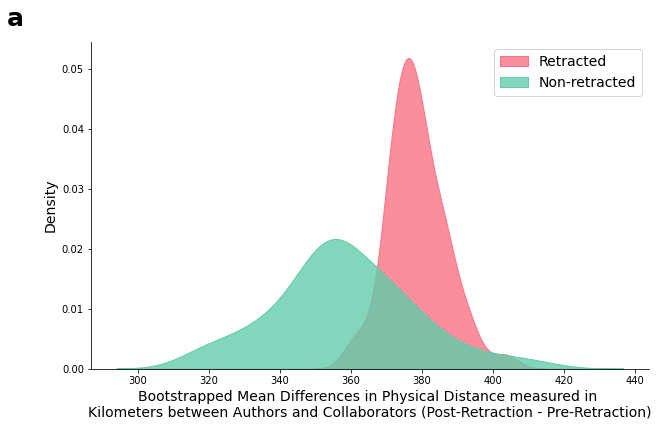

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
fontsize=14

color_treatment = '#fb7285'
color_control = '#62ccaa'

# Create the KDE plot
plt.figure(figsize=(10, 6))


# KDE plot for retracted
sns.kdeplot(treatment_means, color=color_treatment, label='Retracted', shade=True, alpha=0.8)


# KDE plot for matched
sns.kdeplot(control_means, color=color_control, label='Non-retracted', shade=True, alpha=0.8)

# Add title and labels
plt.xlabel('Bootstrapped Mean Differences in Physical Distance measured in \nKilometers between Authors and Collaborators (Post-Retraction - Pre-Retraction)',
          fontsize=fontsize)
plt.ylabel('Density',fontsize=fontsize)

plt.text(-0.15, 1.05, 'a', transform=plt.gca().transAxes, fontsize=25, fontweight='bold', ha='left')

# Add legend
plt.legend(fontsize=fontsize)

sns.despine()

# Show the plot
plt.savefig(OUTDIR+"collaborator_geo_analysis_new.pdf", format='pdf')